# Tarea: Modelos lineales, regularización y selección de modelos en datos reales

Importamos las librerias necesaria 

In [40]:
#importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

## Parte A: Parte A. Regresión lineal desde cero


1. Usando LinearRegression de sklearn

In [10]:
# Paso 2: Cargar dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Paso 3: Crear conjunto de entrenamiento y prueba
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
# Paso 4: Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [13]:
# Ajustar modelo sklearn
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_sklearn = linreg.predict(X_test_scaled)

print("Intercepto sklearn:", linreg.intercept_)
print("Coeficientes sklearn:", linreg.coef_)
print("R2 sklearn:", r2_score(y_test, y_pred_sklearn))

Intercepto sklearn: 2.0719469373788777
Coeficientes sklearn: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R2 sklearn: 0.5757877060324508


In [14]:
# Paso 5: Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Paso 6: Predecir valores en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [17]:
# Ver primeras predicciones
print(y_pred[:10])

[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]


2. MCO de forma cerrada (Closed-form OLS con NumPy)

In [18]:
# Agregar columna de 1s para el intercepto
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [19]:
# Fórmula β = (XᵀX)^(-1) Xᵀy
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

intercept_ols = beta_hat[0]
coef_ols = beta_hat[1:]
y_pred_ols = X_test_bias @ beta_hat

print("Intercepto OLS:", intercept_ols)
print("Coeficientes OLS:", coef_ols)
print("R2 OLS:", r2_score(y_test, y_pred_ols))


Intercepto OLS: 2.071946937378877
Coeficientes OLS: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R2 OLS: 0.5757877060324512


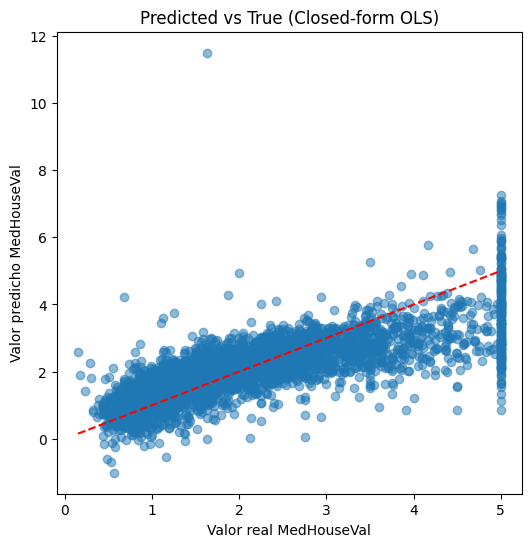

In [20]:
# Plot pred vs real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor real MedHouseVal")
plt.ylabel("Valor predicho MedHouseVal")
plt.title("Predicted vs True (Closed-form OLS)")
plt.show()

3. Descenso de gradiente (implementación desde cero)

In [21]:
# Función de costo MSE
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)


In [22]:
# Descenso de gradiente
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)  # parámetros iniciales
    cost_history = []

    for i in range(n_iter):
        y_pred = X @ theta
        grad = -(2/m) * X.T @ (y - y_pred)
        theta -= lr * grad
        cost_history.append(mse(y, y_pred))
    return theta, cost_history


In [24]:
# Aplicar con datos estandarizados (agregando bias)
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
# Dos tasas de aprendizaje
theta_lr1, cost1 = gradient_descent(X_train_bias, y_train, lr=0.01, n_iter=500)
theta_lr2, cost2 = gradient_descent(X_train_bias, y_train, lr=0.1, n_iter=500)

In [26]:
# Predicciones
y_pred_gd1 = X_test_bias @ theta_lr1
y_pred_gd2 = X_test_bias @ theta_lr2

print("R2 GD (lr=0.01):", r2_score(y_test, y_pred_gd1))
print("R2 GD (lr=0.1):", r2_score(y_test, y_pred_gd2))


R2 GD (lr=0.01): 0.5671785285146533
R2 GD (lr=0.1): 0.5757067717041764


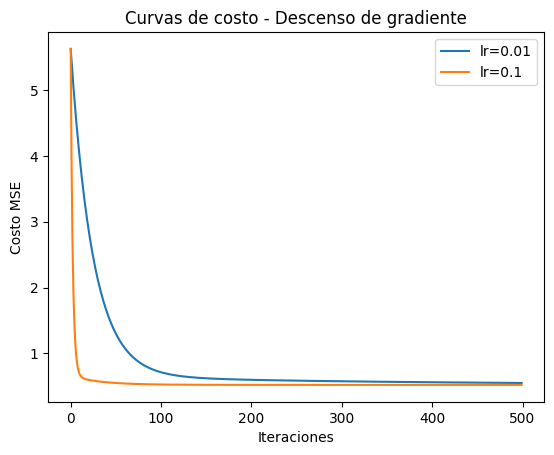

In [27]:
# Graficar curvas de costo
plt.plot(cost1, label="lr=0.01")
plt.plot(cost2, label="lr=0.1")
plt.xlabel("Iteraciones")
plt.ylabel("Costo MSE")
plt.title("Curvas de costo - Descenso de gradiente")
plt.legend()
plt.show()

Parte B. Modelos lineales de Scikit-learn

In [28]:
# 1. Cargar datos
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values

In [29]:
# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# 3. Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [31]:

# 4. Ajustar modelo de sklearn
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# 5. Predicciones
y_pred = linreg.predict(X_test_scaled)
print("R2 sklearn:", r2_score(y_test, y_pred))
print("MSE sklearn:", mean_squared_error(y_test, y_pred))


R2 sklearn: 0.5757877060324508
MSE sklearn: 0.5558915986952444


In [39]:
# 6. Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Intercepto (sklearn):", linreg.intercept_)
print("Coeficientes (sklearn):", linreg.coef_)
print("R² (sklearn):", r2)
print("MSE (sklearn):", mse)
# Comparar resultados
mse_sklearn = mean_squared_error(y_test, y_pred)
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_gd = mean_squared_error(y_test, y_pred_gd1)  # Usando lr=0.01 como referencia


Intercepto (sklearn): 2.0719469373788777
Coeficientes (sklearn): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R² (sklearn): 0.5757877060324508
MSE (sklearn): 0.5558915986952444


In [38]:
import pandas as pd

# --- sklearn ---
intercept_sklearn = linreg.intercept_
coef_sklearn = linreg.coef_
r2_sklearn = r2_score(y_test, y_pred)
mse_sklearn = mean_squared_error(y_test, y_pred)

# --- Closed-form OLS ---
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

intercept_ols = beta_hat[0]
coef_ols = beta_hat[1:]
y_pred_ols = X_test_bias @ beta_hat
r2_ols = r2_score(y_test, y_pred_ols)
mse_ols = mean_squared_error(y_test, y_pred_ols)

# --- Gradient Descent ---
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        y_pred = X @ theta
        grad = -(2/m) * X.T @ (y - y_pred)
        theta -= lr * grad
    return theta

theta_gd = gradient_descent(X_train_bias, y_train, lr=0.01, n_iter=2000)
intercept_gd = theta_gd[0]
coef_gd = theta_gd[1:]
y_pred_gd = X_test_bias @ theta_gd
r2_gd = r2_score(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)

# --- Tabla comparativa ---
df_resultados = pd.DataFrame({
    "Método": ["Sklearn LinearRegression", "OLS (Closed-form)", "Gradiente Descendente"],
    "Intercepto": [intercept_sklearn, intercept_ols, intercept_gd],
    "R²": [r2_sklearn, r2_ols, r2_gd],
    "MSE": [mse_sklearn, mse_ols, mse_gd]
})

#import caas_jupyter_tools
#caas_jupyter_tools.display_dataframe_to_user("Resultados comparativos", df_resultados) 
print(df_resultados)

                     Método  Intercepto        R²       MSE
0  Sklearn LinearRegression    2.071947  0.575788  0.555892
1         OLS (Closed-form)    2.071947  0.575788  0.555892
2     Gradiente Descendente    2.071947  0.575869  0.555785


5. Ridge y Lasso (paths de regularización)

In [41]:

# Valores de alpha log-espaciados entre 1e-3 y 1e2
alphas = np.logspace(-3, 2, 100)

coefs_ridge = []
coefs_lasso = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)

    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    coefs_lasso.append(lasso.coef_)


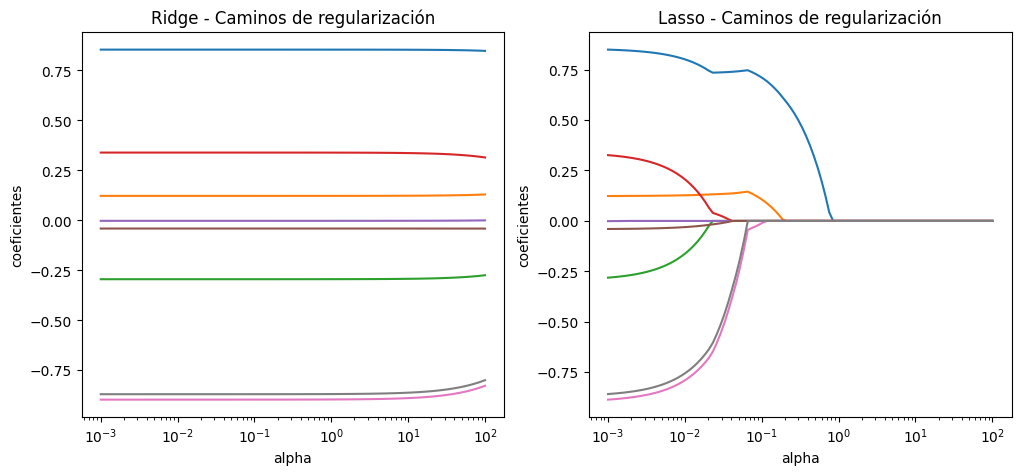

In [44]:
# Graficar trayectorias (coef vs alpha)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(alphas, coefs_ridge)
plt.xscale("log")
plt.title("Ridge - Caminos de regularización")
plt.xlabel("alpha")
plt.ylabel("coeficientes")

plt.subplot(1,2,2)
plt.plot(alphas, coefs_lasso)
plt.xscale("log")
plt.title("Lasso - Caminos de regularización")
plt.xlabel("alpha")
plt.ylabel("coeficientes")

plt.show()

Al graficar la evolución de los coeficientes frente al parámetro de regularización 
𝛼
α (entre 
10
−
3
10
−3
 y 
10
2
10
2
) se observa lo siguiente:

Ridge: todos los coeficientes se reducen en magnitud de manera suave a medida que aumenta 
𝛼
α. Sin embargo, ninguno de ellos llega exactamente a cero. Esto significa que el modelo Ridge conserva todas las variables explicativas, aunque las penaliza para evitar sobreajuste y controlar la multicolinealidad.

Lasso: a diferencia de Ridge, algunos coeficientes sí se reducen exactamente a cero cuando 
𝛼
α crece. Esto implica que Lasso realiza automáticamente selección de variables, descartando aquellas con menor poder explicativo sobre el valor medio de la vivienda. En este dataset, se aprecia que las variables con menor correlación con la variable objetivo son las primeras en ser eliminadas, mientras que las más relevantes (por ejemplo, MedInc, el ingreso medio de la zona) mantienen coeficientes distintos de cero incluso con alta penalización.

En conclusión, Ridge estabiliza el modelo sin eliminar predictores, mientras que Lasso promueve la parsimonia reduciendo a cero los coeficientes de variables poco informativas.

6. Validación cruzada (KFold + cross_val_score vs RidgeCV / LassoCV)

In [46]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, make_scorer


In [47]:
# Definir CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [49]:
# RidgeCV y LassoCV seleccionan alpha óptimo
ridge_cv = RidgeCV(alphas=alphas, scoring=mse_scorer, cv=kf)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas, cv=kf, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor alpha Ridge:", ridge_cv.alpha_)
print("Mejor alpha Lasso:", lasso_cv.alpha_)
print("Coeficientes Ridge:", ridge_cv.coef_)
print("Coeficientes Lasso:", lasso_cv.coef_)


Mejor alpha Ridge: 3.4304692863149193
Mejor alpha Lasso: 0.001
Coeficientes Ridge: [ 0.85418945  0.12281215 -0.29372474  0.33839705 -0.00222043 -0.04084244
 -0.89432364 -0.8672031 ]
Coeficientes Lasso: [ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]


In [50]:

# Evaluación en test
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

print("MSE RidgeCV:", mean_squared_error(y_test, y_pred_ridge))
print("MSE LassoCV:", mean_squared_error(y_test, y_pred_lasso))

MSE RidgeCV: 0.5557665649520095
MSE LassoCV: 0.5544913600832686


7. Ingeniería de características y multicolinealidad (PolynomialFeatures)

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# Crear características polinomiales (grado 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Dimensiones originales:", X_train_scaled.shape)
print("Dimensiones polinomiales:", X_train_poly.shape)

Dimensiones originales: (16512, 8)
Dimensiones polinomiales: (16512, 44)


In [53]:
# Reajustar Ridge y Lasso en espacio ampliado
ridge_poly = RidgeCV(alphas=alphas, scoring=mse_scorer, cv=kf)
ridge_poly.fit(X_train_poly, y_train)

lasso_poly = LassoCV(alphas=alphas, cv=kf, max_iter=10000)
lasso_poly.fit(X_train_poly, y_train)

print("Mejor alpha Ridge (polinomial):", ridge_poly.alpha_)
print("Mejor alpha Lasso (polinomial):", lasso_poly.alpha_)

print("MSE Ridge (polinomial):", mean_squared_error(y_test, ridge_poly.predict(X_test_poly)))
print("MSE Lasso (polinomial):", mean_squared_error(y_test, lasso_poly.predict(X_test_poly)))

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.111e+00, tolerance: 1.769e+00
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.120e+00, tolerance: 1.769e+00
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\loc

Mejor alpha Ridge (polinomial): 100.0
Mejor alpha Lasso (polinomial): 0.016297508346206444
MSE Ridge (polinomial): 0.4474044795486506
MSE Lasso (polinomial): 0.5740561977132917


## Parte D. Alquiler de bicicletas

1. Cargar y explorar

In [56]:
# Cargar dataset 
pd.read_csv("data/hour.csv")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
